In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

## Getting the data from Keras Datasets

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 7s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

## Show Image Function

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

def showImage(X,y,index, y_classes=0):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  if(y_classes == 0):
    plt.xlabel('Label: {} - Prediction: {}'.format(classes[y[index]],  'NaN'))
    return
  plt.xlabel('Label: {} - Prediction: {}'.format(classes[y[index]],  classes[y_classes[index]]))

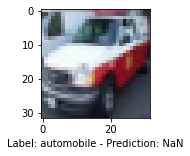

In [ ]:
showImage(X_train,y_train,60)

## Normalizing the data

In [ ]:
X_train = X_train/255
X_test = X_test/255

## Simple Model Fit

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 14s 7ms/step - loss: 1.8176 - accuracy: 0.3522
Epoch 2/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6261 - accuracy: 0.4264
Epoch 3/5
1563/1563 [==============================] - 10s 7ms/step - loss: 1.5431 - accuracy: 0.4569
Epoch 4/5
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4817 - accuracy: 0.4785
Epoch 5/5
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4336 - accuracy: 0.4966


In [ ]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 8s 25ms/step - loss: 1.4677 - accuracy: 0.4762


[1.4677257537841797, 0.47620001435279846]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('Classification Report: \n',classification_report(y_test,y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.48      0.52      1000
           1       0.63      0.61      0.62      1000
           2       0.26      0.62      0.37      1000
           3       0.40      0.27      0.32      1000
           4       0.48      0.29      0.36      1000
           5       0.56      0.23      0.33      1000
           6       0.47      0.62      0.53      1000
           7       0.68      0.43      0.52      1000
           8       0.55      0.68      0.61      1000
           9       0.55      0.56      0.55      1000

    accuracy                           0.48     10000
   macro avg       0.52      0.48      0.47     10000
weighted avg       0.52      0.48      0.47     10000



In [ ]:
## CNN Layers

cnn = models.Sequential([
  ## CNN
  layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = (32, 32, 3)),
  layers.MaxPooling2D((2,2)),

  layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
  layers.MaxPooling2D((2,2)),


  ## Dense      
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(10, activation='softmax')
                      
])

## Sigmoid output is direct
## Softmax output is normalized.Sum of results is 1

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 16s 6ms/step - loss: 1.4544 - accuracy: 0.4769
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1101 - accuracy: 0.6103
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9828 - accuracy: 0.6577
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9014 - accuracy: 0.6856
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8290 - accuracy: 0.7133
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7740 - accuracy: 0.7311
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7168 - accuracy: 0.7487
Epoch 8/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6735 - accuracy: 0.7647
Epoch 9/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6342 - accuracy: 0.7760
Epoch 10/10
1563/1563 [==============================] - 10s 6ms/step - l

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9884 - accuracy: 0.6821


[0.9884434342384338, 0.6820999979972839]

In [ ]:
y_pred = cnn.predict(X_test)
y_classes = [np.argmax(element) for element in y_pred]


In [ ]:
y_test = y_test.reshape(-1,)
classes[y_test[0]]

'cat'

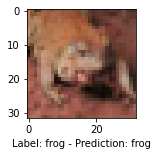

In [ ]:
showImage(X_test, y_test, 5, y_classes)

## Hyperparameter Optimization - Keras Tuner


In [ ]:
pip install keras-tuner 

In [ ]:
import keras_tuner as kt
from keras_tuner import RandomSearch


def build_model(hp):
  model = models.Sequential()

  # model.add(layers.AveragePooling2D(6,3,input_shape=(32, 32, 3)))

  for i in range(hp.Int("Conv Layers", min_value=0, max_value=3)):
    model.add(layers.Conv2D(filters=hp.Choice(f"layer_{i}_filters", [4,8,16,32]), kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)))
  
  model.add(layers.MaxPool2D(2,2))
  # model.add(keras.layers.Dropout(0.5))
  model.add(layers.Flatten())

  model.add(layers.Dense(hp.Choice("Dense layer", [32, 64, 128]), activation='relu'))

  model.add(layers.Dense(10, activation='softmax'))

  model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model


tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=24,
    overwrite=True
)

tuner.search(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Trial 6 Complete [00h 06m 21s]
val_accuracy: 0.5860000252723694

Best val_accuracy So Far: 0.6068000197410583
Total elapsed time: 00h 45m 27s

Search: Running Trial #7

Hyperparameter    |Value             |Best Value So Far 
Conv Layers       |2                 |2                 
Dense layer       |64                |128               
layer_0_filters   |32                |32                
layer_1_filters   |16                |8                 
layer_2_filters   |4                 |16                

Epoch 1/10
1563/1563 [==============================] - 96s 61ms/step - loss: 1.4566 - accuracy: 0.4777 - val_loss: 1.2119 - val_accuracy: 0.5719
Epoch 2/10
1563/1563 [==============================] - 96s 61ms/step - loss: 1.1147 - accuracy: 0.6055 - val_loss: 1.0730 - val_accuracy: 0.6233
Epoch 3/10
1563/1563 [==============================] - 96s 61ms/step - loss: 0.9674 - accuracy: 0.6615 - val_loss: 1.0223 - val_accuracy: 0.6428
Epoch 4/10
1563/1563 [============================

In [ ]:
best_model = tuner.get_best_models()[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 64)                401472    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                        

In [ ]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
Conv Layers: 2
Dense layer: 64
layer_0_filters: 16
layer_1_filters: 32
layer_2_filters: 8
Score: 0.6780999898910522
Trial summary
Hyperparameters:
Conv Layers: 2
Dense layer: 64
layer_0_filters: 16
layer_1_filters: 32
layer_2_filters: 16
Score: 0.6762999892234802
Trial summary
Hyperparameters:
Conv Layers: 2
Dense layer: 64
layer_0_filters: 32
layer_1_filters: 32
layer_2_filters: 16
Score: 0.6730999946594238
Trial summary
Hyperparameters:
Conv Layers: 2
Dense layer: 64
layer_0_filters: 32
layer_1_filters: 16
layer_2_filters: 16
Score: 0.6687999963760376
Trial summary
Hyperparameters:
Conv Layers: 2
Dense layer: 32
layer_0_filters: 16
layer_1_filters: 32
layer_2_filters: 32
Score: 0.6632999777793884
Trial summary
Hyperparameters:
Conv Layers: 2
Dense layer: 64
layer_0_filters: 8
layer_1_filters: 16
layer_2_filters: 8
Score: 0.650499999523162

In [ ]:
best_model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.9471 - accuracy: 0.6781


[0.9471351504325867, 0.6780999898910522]